In [1]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it
from scipy.signal import find_peaks, savgol_filter, peak_widths
import matplotlib.pyplot as plt
from ekpy.analysis.analysisgeotemp import use_analysis_file #note need to make this under __all__

In [2]:
# load the dataset
Data_folder_path = "C:/Users/geofr/Desktop/Research/Data/FE/PUND/Python/"

dset = analysis.load_Dataset(Data_folder_path + r'BTO')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,0,fe_PUND_PV__0.csv
1,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,1,fe_PUND_PV__1.csv
2,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,2,fe_PUND_PV__2.csv
3,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,3,fe_PUND_PV__3.csv
4,0.0010,0.100,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000512,-0.011953,0,0.040201,0.0,0,4,fe_PUND_PV__4.csv
5,0.0010,0.100,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000512,-0.011953,0,0.040201,0.0,0,5,fe_PUND_PV__5.csv
6,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,6,fe_PUND_PV__6.csv
7,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,7,fe_PUND_PV__7.csv
8,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,8,fe_PUND_PV__8.csv
9,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,9,fe_PUND_PV__9.csv


In [3]:
data2= dset.select_index(0).get_data()
data2

{0: {'data': {'time_c': array([-1.406250e-04, -1.346250e-04, -1.286250e-04, -1.226250e-04,
       -1.166250e-04, -1.106250e-04, -1.046250e-04, -9.862500e-05,
       -9.262500e-05, -8.662500e-05, -8.062500e-05, -7.462500e-05,
       -6.862500e-05, -6.262500e-05, -5.662500e-05, -5.062500e-05,
       -4.462500e-05, -3.862500e-05, -3.262500e-05, -2.662500e-05,
       -2.062500e-05, -1.462500e-05, -8.625000e-06, -2.625000e-06,
        3.375000e-06,  9.375000e-06,  1.537500e-05,  2.137500e-05,
        2.737500e-05,  3.337500e-05,  3.937500e-05,  4.537500e-05,
        5.137500e-05,  5.737500e-05,  6.337500e-05,  6.937500e-05,
        7.537500e-05,  8.137500e-05,  8.737500e-05,  9.337500e-05,
        9.937500e-05,  1.053750e-04,  1.113750e-04,  1.173750e-04,
        1.233750e-04,  1.293750e-04,  1.353750e-04,  1.413750e-04,
        1.473750e-04,  1.533750e-04,  1.593750e-04,  1.653750e-04,
        1.713750e-04,  1.773750e-04,  1.833750e-04,  1.893750e-04,
        1.953750e-04,  2.013750e-04,  

In [4]:
data3 = dset.query("trial < 2")
data3

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,0,fe_PUND_PV__0.csv
1,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,1,fe_PUND_PV__1.csv


In [5]:
my_dict = {}
my_dict[0] = np.array([1,2,3,4,5])
my_dict[1] = np.array([3,3,3,3,3])
x = np.array(1,2,3,4,5)

{0: {'data': {'time_c': array([-1.406250e-04, -1.346250e-04, -1.286250e-04, -1.226250e-04,
       -1.166250e-04, -1.106250e-04, -1.046250e-04, -9.862500e-05,
       -9.262500e-05, -8.662500e-05, -8.062500e-05, -7.462500e-05,
       -6.862500e-05, -6.262500e-05, -5.662500e-05, -5.062500e-05,
       -4.462500e-05, -3.862500e-05, -3.262500e-05, -2.662500e-05,
       -2.062500e-05, -1.462500e-05, -8.625000e-06, -2.625000e-06,
        3.375000e-06,  9.375000e-06,  1.537500e-05,  2.137500e-05,
        2.737500e-05,  3.337500e-05,  3.937500e-05,  4.537500e-05,
        5.137500e-05,  5.737500e-05,  6.337500e-05,  6.937500e-05,
        7.537500e-05,  8.137500e-05,  8.737500e-05,  9.337500e-05,
        9.937500e-05,  1.053750e-04,  1.113750e-04,  1.173750e-04,
        1.233750e-04,  1.293750e-04,  1.353750e-04,  1.413750e-04,
        1.473750e-04,  1.533750e-04,  1.593750e-04,  1.653750e-04,
        1.713750e-04,  1.773750e-04,  1.833750e-04,  1.893750e-04,
        1.953750e-04,  2.013750e-04,  

1000 <class 'numpy.ndarray'>
1000 <class 'numpy.ndarray'>
worked til here
10 <class 'numpy.ndarray'>
1000 <class 'numpy.ndarray'>
<class 'numpy.ndarray'>
worked til here


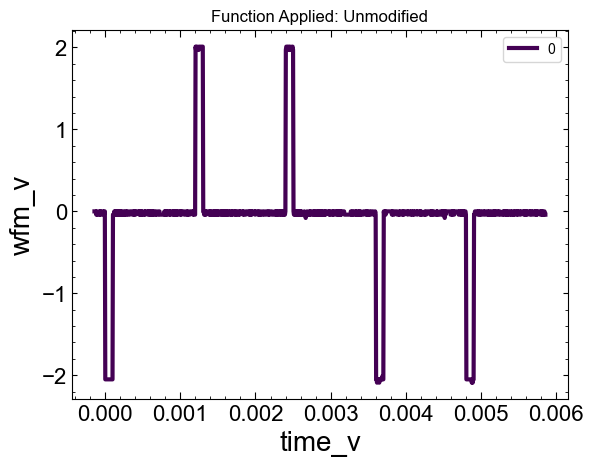

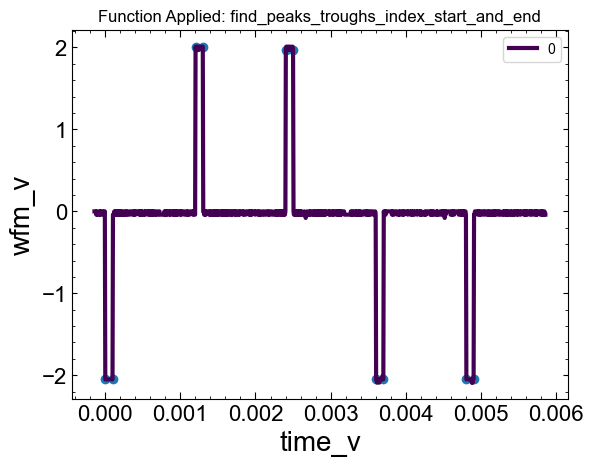

In [6]:
modified_data, interm_steps = use_analysis_file('analysisfile', data2, verbose=True, dont_pass_defn=False)

In [7]:
modified_data.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c', 'calc_vals']

In [8]:
modified_data.calc_vals

array([-1.20603003e-07, -9.64824021e-07, -2.41206005e-07, -3.61809008e-07])